In [ ]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # sci-kit learn library to split tr
from sklearn.preprocessing import StandardScaler # to rescale the numerical data (Anothe

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
data = pd.read_csv("Video_Games.csv")
print(data.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [ ]:
data.describe

<bound method NDFrame.describe of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

     

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
print(data.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [ ]:
data.shape

(16719, 16)

In [ ]:
#checking for the null values for the name column
data.loc[data["Name"].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#using mode to replace the null values
Name_mode=mode_genre=data['Name'].mode()

In [ ]:
Name_mode

0    Need for Speed: Most Wanted
Name: Name, dtype: object

In [ ]:
#filing the 'NA' with 'mode'
data["Name"] = data["Name"].fillna('Need for Speed: Most Wanted')

In [ ]:
data.loc[data["Year_of_Release"].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,tbd,NaN,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#using mode to replace the null values for year of release
mode_year =statistics.mode (data['Year_of_Release'])
mode_year

2008.0

In [ ]:
#filing the null values with the mode
data['Year_of_Release'] = data["Year_of_Release"].fillna(mode_year)

In [ ]:
# using mode to replace with Null values
mode_genre=data['Genre'].mode()
mode_genre

0    Action
Name: Genre, dtype: object

In [ ]:
#filing the null values with mode
data['Genre'] = data['Genre'].fillna('Action')

In [ ]:
data['Genre'].isna().sum()

0

In [ ]:
data['Publisher'].mode()

0    Electronic Arts
Name: Publisher, dtype: object

In [ ]:
#filing the na with the mode
data['Publisher'] = data['Publisher'].fillna('Electronic Arts')

In [ ]:
mode_criticS =statistics.mode(data['Critic_Score'])
mode_criticS

70.0

In [ ]:
data['Critic_Score'] = data['Critic_Score'].fillna(mode_criticS)

In [ ]:
mode_criticC =statistics.mode(data['Critic_Count'])
mode_criticC

4.0

In [ ]:
data['Critic_Count'] = data['Critic_Count'].fillna(mode_criticC)

In [ ]:
mode_userC =statistics.mode(data['User_Count'])
mode_userC

4.0

In [ ]:
data['User_Count'] = data['User_Count'].fillna(mode_userC)

In [ ]:
data.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

In [ ]:
data["User_Score"] = data["User_Score"].replace('tbd', 0)

In [ ]:
data["User_Score"] = data["User_Score"].astype(float)

In [ ]:
data["User_Score"].describe()

count    10015.000000
mean         5.399810
std          3.319944
min          0.000000
25%          2.400000
50%          6.900000
75%          8.000000
max          9.700000
Name: User_Score, dtype: float64

In [ ]:
#since 75% of data for user score is 8.0 so i replaced the null values with 8.0
data['User_Score'] = data['User_Score'].fillna(8.0)

In [ ]:
# finding the mode for the developer
mode_Developer=data['Developer'].mode()
mode_Developer


0    Ubisoft
Name: Developer, dtype: object

In [ ]:
# filling the na value with mode
data['Developer'] = data['Developer'].fillna('Ubisoft')

In [ ]:
# finding the mode for rating
mode_Rating=data['Rating'].mode()
mode_Rating

0    E
Name: Rating, dtype: object

In [ ]:
#filing the na value with the mode
data['Rating'] = data['Rating'].fillna('E')

In [ ]:
data.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [ ]:
#finding the correlation
data.corr()

<ipython-input-40-0421f6a99cec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092531,0.003386,-0.168853,0.037286,-0.076736,-0.000747,0.158675,-0.140254,0.121691
NA_Sales,-0.092531,1.000000,0.765336,0.449598,0.638654,0.941010,0.179135,0.242758,0.072387,0.210717
EU_Sales,0.003386,0.765336,1.000000,0.435068,0.722796,0.901239,0.187731,0.265835,0.076817,0.273933
JP_Sales,-0.168853,0.449598,0.435068,1.000000,0.291096,0.612300,0.095016,0.036550,0.132853,0.033114
Other_Sales,0.037286,0.638654,0.722796,0.291096,1.000000,0.749242,0.177677,0.263492,0.063187,0.250196
Global_Sales,-0.076736,0.941010,0.901239,0.612300,0.749242,1.000000,0.195510,0.253021,0.097079,0.236535
Critic_Score,-0.000747,0.179135,0.187731,0.095016,0.177677,0.195510,1.000000,0.290514,0.315737,0.252610
Critic_Count,0.158675,0.242758,0.265835,0.036550,0.263492,0.253021,0.290514,1.000000,0.140508,0.399931
User_Score,-0.140254,0.072387,0.076817,0.132853,0.063187,0.097079,0.315737,0.140508,1.000000,0.053589
User_Count,0.121691,0.210717,0.273933,0.033114,0.250196,0.236535,0.252610,0.399931,0.053589,1.000000


<ipython-input-41-d061c747a44c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Spectral', vmin=-1, vmax= 1)


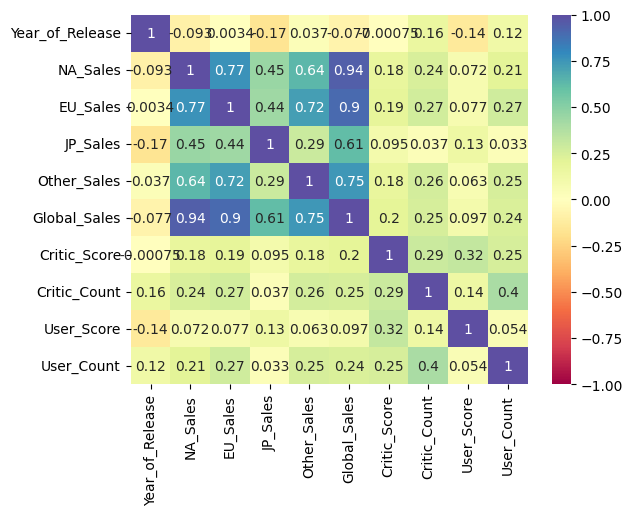

In [ ]:
#I created a heatmap showing the correlation matrix visualize the relationship between the variables
sns.heatmap(data.corr(), annot=True, cmap='Spectral', vmin=-1, vmax= 1)
plt.show()

In [ ]:
# split data into input and output variables
X= data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Critic_Score', 'User_Score','Critic_Count','User_Count']]
y= data["Global_Sales"]

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaling the dataset
# to use regularization, you can apply standard scaler
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)

In [ ]:
#importing the linear egression library
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_pred = mlr.predict(X_test)

In [ ]:
print('Coefficients:', mlr.coef_)
print('Intercept:', mlr.intercept_)
mean_squared = mean_squared_error(y_test,mlr_pred)
print(f"The result of the mean squared error for the linear regression is : {mean_squared}")
print(f"The coefficient of determination for the linear regression is: {r2_score(y_test,mlr_pred)}")

Coefficients: [ 7.54513063e-01  4.41863469e-01  3.08071596e-01  1.80867589e-01
 -9.89409289e-06 -6.79430732e-05 -5.50430044e-05 -1.05053474e-04]
Intercept: 0.5255543925233646
The result of the mean squared error for the linear regression is : 2.7834846961324935e-05
The coefficient of determination for the linear regression is: 0.9999932569888903


In [ ]:
# Print the coefficients for each variable
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': mlr.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

       Variable  Coefficient
0      NA_Sales     0.754513
1      EU_Sales     0.441863
2      JP_Sales     0.308072
3   Other_Sales     0.180868
4  Critic_Score    -0.000010
6  Critic_Count    -0.000055
5    User_Score    -0.000068
7    User_Count    -0.000105


In [ ]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred= rf.predict(X_test)
mean_squared = mean_squared_error(y_test,rf_pred)
print(f"The result of the mean squared error for Random Forest is : {mean_squared}")
print(f"The coefficient of determination for Random Forest Regression is: {r2_score(y_test,rf_pred)}")

The result of the mean squared error for Random Forest is : 0.7303005363192598
The coefficient of determination for Random Forest Regression is: 0.8230841852069443


In [ ]:
#checking the imprtances
rf.feature_importances_

array([8.47199799e-01, 1.00299404e-01, 3.26921598e-02, 1.57522664e-02,
       7.02542146e-04, 1.27808491e-03, 6.98521615e-04, 1.37722162e-03])

In [ ]:
print(rf.feature_importances_)

[8.47199799e-01 1.00299404e-01 3.26921598e-02 1.57522664e-02
 7.02542146e-04 1.27808491e-03 6.98521615e-04 1.37722162e-03]


In [ ]:
#checking the importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values('Importance', ascending=False).reset_index(drop=True)
print(importances.head(10))

        Feature  Importance
0      NA_Sales    0.847200
1      EU_Sales    0.100299
2      JP_Sales    0.032692
3   Other_Sales    0.015752
4    User_Count    0.001377
5    User_Score    0.001278
6  Critic_Score    0.000703
7  Critic_Count    0.000699


In [ ]:
# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mean_squared = mean_squared_error(y_test,y_pred_gb)
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The coefficient of determination is: {r2_score(y_test,y_pred_gb)}")

The result of the mean squared error is : 0.5964742505551635
The coefficient of determination is: 0.855503696366023


In [ ]:
print(gb.feature_importances_)

[7.61222666e-01 1.58302299e-01 5.13008775e-02 2.90217975e-02
 2.47928699e-05 1.63566779e-05 4.86167729e-05 6.25938202e-05]


In [ ]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': gb.feature_importances_})
importances = importances.sort_values('Importance', ascending=False).reset_index(drop=True)
print(importances.head(10))

        Feature  Importance
0      NA_Sales    0.761223
1      EU_Sales    0.158302
2      JP_Sales    0.051301
3   Other_Sales    0.029022
4    User_Count    0.000063
5  Critic_Count    0.000049
6  Critic_Score    0.000025
7    User_Score    0.000016


In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
#print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
mean_squared = mean_squared_error(y_test,y_pred_lasso)
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The coefficient of determination is: {r2_score(y_test,y_pred_lasso)}")

Coefficients: [0.7260019  0.42723184 0.24245814 0.1224739  0.         0.
 0.         0.        ]
Intercept: 0.5255543925233646
The result of the mean squared error is : 0.0273979806833162
The coefficient of determination is: 0.9933628200511765


In [ ]:
# Print the coefficients for each variable
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

       Variable  Coefficient
0      NA_Sales     0.726002
1      EU_Sales     0.427232
2      JP_Sales     0.242458
3   Other_Sales     0.122474
4  Critic_Score     0.000000
5    User_Score     0.000000
6  Critic_Count     0.000000
7    User_Count     0.000000


In [ ]:
from sklearn.linear_model import Ridge
# Ridge Regression
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
#print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
mean_squared = mean_squared_error(y_test,y_pred_ridge)
print(f"The result of the mean squared error for ridge regression is : {mean_squared}")
print(f"The coefficient of determination for ridge regression is: {r2_score(y_test,y_pred_ridge)}")

Coefficients: [ 7.54477136e-01  4.41860571e-01  3.08074266e-01  1.80878657e-01
 -7.05437682e-06 -6.77296659e-05 -5.07533973e-05 -1.01165761e-04]
Intercept: 0.5255543925233646
The result of the mean squared error for ridge regression is : 2.7819147401899672e-05
The coefficient of determination for ridge regression is: 0.9999932607921196


In [ ]:
# Print the coefficients for each variable
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': ridge.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

       Variable  Coefficient
0      NA_Sales     0.754477
1      EU_Sales     0.441861
2      JP_Sales     0.308074
3   Other_Sales     0.180879
4  Critic_Score    -0.000007
6  Critic_Count    -0.000051
5    User_Score    -0.000068
7    User_Count    -0.000101


In [ ]:
# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr))
print("Coefficients:", svr.coef_)
print("Intercept:", svr.intercept_)
mean_squared = mean_squared_error(y_test,y_pred_svr)
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The coefficient of determination is: {r2_score(y_test,y_pred_svr)}")

Support Vector Regression MSE: 0.005977788737775397
Coefficients: [[ 0.75047819  0.43755661  0.30844844  0.18189074 -0.00222653  0.00464231
   0.00192165  0.0007604 ]]
Intercept: [0.60202856]
The result of the mean squared error is : 0.005977788737775397
The coefficient of determination is: 0.9985518765047956


In [ ]:
# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)
mean_squared = mean_squared_error(y_test,y_pred_kn)
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The coefficient of determination is: {r2_score(y_test,y_pred_kn)}")

The result of the mean squared error is : 0.9251125424432489
The coefficient of determination is: 0.7758908407126328


In [ ]:
# fit decision tree regression model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"The result of the mean squared error for decision tree regressor is : {mse_dt}")
print(f"The coefficient of determination for decision tree regressor is: {r2_score(y_test,y_pred_dt)}")

The result of the mean squared error for decision tree regressor is : 0.6068986036952043
The coefficient of determination for decision tree regressor is: 0.8529783895399375


In [ ]:
print(dt.feature_importances_)

[8.50569057e-01 1.08908158e-01 2.70927498e-02 1.05574426e-02
 8.07320068e-04 2.81465393e-04 1.03740447e-03 7.46402658e-04]


In [ ]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
importances = importances.sort_values('Importance', ascending=False).reset_index(drop=True)
print(importances.head(10))

        Feature  Importance
0      NA_Sales    0.850569
1      EU_Sales    0.108908
2      JP_Sales    0.027093
3   Other_Sales    0.010557
4  Critic_Count    0.001037
5  Critic_Score    0.000807
6    User_Count    0.000746
7    User_Score    0.000281


In [ ]:
from sklearn.linear_model import LinearRegression

#  a new dataframe with the relevant variables
data_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Critic_Count', 'User_Count', 'Critic_Score', 'User_Score']]

#  a linear regression model for each region
reg_na = LinearRegression().fit(data_reg[['Critic_Count', 'User_Count', 'Critic_Score', 'User_Score']], data_reg['NA_Sales'])
reg_eu = LinearRegression().fit(data_reg[['Critic_Count', 'User_Count', 'Critic_Score', 'User_Score']], data_reg['EU_Sales'])
reg_jp = LinearRegression().fit(data_reg[['Critic_Count', 'User_Count', 'Critic_Score', 'User_Score']], data_reg['JP_Sales'])


#print(reg_na.feature_importances_)
# Print the coefficients for each region
print('North America Sales:')
print('Critic_Count:', reg_na.coef_[0])
print('User_Count:', reg_na.coef_[1])
print('Critic_Score:', reg_na.coef_[2])
print('User_Score:', reg_na.coef_[3])
print('------------------------')
print('EU Sales:')
print('Critic_Count:', reg_eu.coef_[0])
print('User_Count:', reg_eu.coef_[1])
print('Critic_Score:', reg_eu.coef_[2])
print('User_Score:', reg_eu.coef_[3])
print('------------------------')
print('Japan Sales:')
print('Critic_Count:', reg_jp.coef_[0])
print('User_Count:', reg_jp.coef_[1])
print('Critic_Score:', reg_jp.coef_[2])
print('User_Score:', reg_jp.coef_[3])


North America Sales:
Critic_Count: 0.007747731649554954
User_Count: 0.0002517133338773034
Critic_Score: 0.008118862694803173
User_Score: 0.0034354610547349855
------------------------
EU Sales:
Critic_Count: 0.004759198362315893
User_Count: 0.00024135085589988144
Critic_Score: 0.004563215024855755
User_Score: 0.0028062101301835406
------------------------
Japan Sales:
Critic_Count: -1.9421629402395517e-05
User_Count: 1.0648128822329076e-05
Critic_Score: 0.00176837493193132
User_Score: 0.01234862028947768


CLASSIFICATION ANALYSIS

In [ ]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
data_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Critic_Count', 'User_Count', 'Critic_Score', 'User_Score', 'Global_Sales','Genre','Rating','Publisher','Developer','Platform','Year_of_Release']]

In [ ]:
#convert target variable to numerical using label encoding
le = LabelEncoder()

data_reg['Platform'] = le.fit_transform(data_reg['Platform'])
data_reg['Genre'] = le.fit_transform(data_reg['Genre'])
data_reg['Publisher'] = le.fit_transform(data_reg['Publisher'])
data_reg['Developer'] = le.fit_transform(data_reg['Developer'])
data_reg['Rating'] = le.fit_transform(data_reg['Rating'])


<ipython-input-68-078461a1b690>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg['Platform'] = le.fit_transform(data_reg['Platform'])
<ipython-input-68-078461a1b690>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg['Genre'] = le.fit_transform(data_reg['Genre'])
<ipython-input-68-078461a1b690>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Rating

In [ ]:
X = data_reg.drop(['Rating'], axis=1)
y = data['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
#train accuracy 
train_accuracy = accuracy_score (y_train, y_train_pred)
train_accuracy


0.9999252336448599

In [ ]:
#test accuracy for random forest classifier
y_test_pred = rfc.predict(X_test)
test_accuracy = accuracy_score (y_test, y_test_pred)
test_accuracy


0.8008373205741627

In [ ]:
#train the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_train_pred = dt.predict(X_train)
#train accuracy
train_accuracy = accuracy_score (y_train, y_train_pred)
train_accuracy


0.9999252336448599

In [ ]:
#test accuracy for decision tree classifier
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score (y_test, y_test_pred)
test_accuracy

0.7547846889952153

In [ ]:
#train the logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
#train_accuracy
train_accuracy = accuracy_score (y_train, y_train_pred)
train_accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6870280373831775

In [ ]:
#test accuracy for logistic regression
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score (y_test, y_test_pred)
test_accuracy

0.6863038277511961

In [ ]:
# Train the Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)
#train accuracy
train_accuracy = accuracy_score (y_train, y_train_pred)
train_accuracy


0.41226168224299065

In [ ]:
#test accuracy for Naive Bayes classifier
y_test_pred = gnb.predict(X_test)
test_accuracy = accuracy_score (y_test, y_test_pred)
test_accuracy

0.41985645933014354

In [ ]:
#classification report for random forest classifier
print('Classification Report:')
print(classification_report(y_test,y_pred_rfc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc))

Classification Report:
              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         1
           E       0.88      0.94      0.91      2136
        E10+       0.66      0.33      0.44       298
          EC       1.00      1.00      1.00         1
         K-A       0.00      0.00      0.00         1
           M       0.69      0.56      0.62       327
           T       0.59      0.66      0.62       580

    accuracy                           0.80      3344
   macro avg       0.55      0.50      0.51      3344
weighted avg       0.79      0.80      0.79      3344

Confusion Matrix:
[[   0    0    0    0    0    1    0]
 [   0 2015   23    0    0   12   86]
 [   0  131   99    0    0    7   61]
 [   0    0    0    1    0    0    0]
 [   0    1    0    0    0    0    0]
 [   0   23    7    0    0  183  114]
 [   0  118   21    0    0   61  380]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#classification report for decision tree
print('Classification Report:')
print(classification_report(y_test,y_pred_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         1
           E       0.89      0.90      0.89      2136
        E10+       0.45      0.40      0.42       298
          EC       0.33      1.00      0.50         1
         K-A       0.00      0.00      0.00         1
           M       0.56      0.55      0.55       327
          RP       0.00      0.00      0.00         0
           T       0.52      0.54      0.53       580

    accuracy                           0.75      3344
   macro avg       0.34      0.42      0.36      3344
weighted avg       0.75      0.75      0.75      3344

Confusion Matrix:
[[   0    0    0    0    0    1    0    0]
 [   0 1914   74    0    0   22    0  126]
 [   0  101  118    0    0   17    1   61]
 [   0    0    0    1    0    0    0    0]
 [   0    1    0    0    0    0    0    0]
 [   0   30   20    0    0  180    0   97]
 [   0    0    0    0    0    0    0    0]
 [   0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         1
           E       0.75      0.94      0.83      2136
        E10+       0.00      0.00      0.00       298
          EC       0.00      0.00      0.00         1
         K-A       0.00      0.00      0.00         1
           M       0.69      0.21      0.33       327
           T       0.39      0.37      0.38       580

    accuracy                           0.69      3344
   macro avg       0.26      0.22      0.22      3344
weighted avg       0.61      0.69      0.63      3344

Confusion Matrix:
[[   0    0    0    0    0    0    1]
 [   0 2009    0    0    0    5  122]
 [   0  220    0    0    0    6   72]
 [   0    1    0    0    0    0    0]
 [   0    1    0    0    0    0    0]
 [   0  108    0    0    0   70  149]
 [   0  344    0    0    0   20  216]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_gnb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gnb))

Classification Report:
              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         1
           E       0.74      0.48      0.58      2136
        E10+       0.23      0.18      0.20       298
          EC       0.00      1.00      0.00         1
         K-A       0.00      0.00      0.00         1
           M       0.48      0.22      0.30       327
          RP       0.00      0.00      0.00         0
           T       0.37      0.43      0.40       580

    accuracy                           0.42      3344
   macro avg       0.23      0.29      0.19      3344
weighted avg       0.61      0.42      0.49      3344

Confusion Matrix:
[[   0    0    0    0    0    1    0    0]
 [   0 1027  101  791    0   33   11  173]
 [   0  107   54   44    0    9    2   82]
 [   0    0    0    1    0    0    0    0]
 [   0    1    0    0    0    0    0    0]
 [   0   47   23    7    0   72    3  175]
 [   0    0    0    0    0    0    0    0]
 [   0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
#Train and evaluate the Decision Tree Classifier using cross-validation
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dtc, X_train, y_train, cv=10)
print("Decision Tree Classifier:")
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print('Standard deviation:', scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Decision Tree Classifier:
Cross-validation scores: [0.77727952 0.74663677 0.74887892 0.77503737 0.74887892 0.76813762
 0.73074046 0.77038145 0.73223635 0.73597607]
Mean score: 0.7534183461847631
Standard deviation: 0.01701628858540001


GENRE

In [ ]:
X = data_reg.drop(['Genre'], axis=1)
y = data['Genre']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
#train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy


0.9866168224299066

In [ ]:
#test accuracy for random forest classifier
y_test_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.4144736842105263

In [ ]:
#train the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_train_pred = dt.predict(X_train)
#train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.9866168224299066

In [ ]:
#test accuracy for decision tree classifier
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.36483253588516745

In [ ]:
#train the logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
#train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2188411214953271

In [ ]:
#test accuracy for logistic regression
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.222188995215311

In [ ]:
# Train the Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)
#train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.17689719626168224

In [ ]:
#test accuracy for Naive Bayes Classifier
y_test_pred = gnb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.17583732057416268

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

      Action       0.45      0.45      0.45       704
   Adventure       0.32      0.35      0.34       248
    Fighting       0.26      0.30      0.28       161
        Misc       0.33      0.33      0.33       324
    Platform       0.23      0.24      0.23       170
      Puzzle       0.25      0.22      0.24       116
      Racing       0.32      0.33      0.32       243
Role-Playing       0.37      0.34      0.36       306
     Shooter       0.37      0.40      0.38       258
  Simulation       0.26      0.24      0.25       199
      Sports       0.47      0.51      0.49       465
    Strategy       0.26      0.19      0.22       150

    accuracy                           0.36      3344
   macro avg       0.33      0.32      0.32      3344
weighted avg       0.36      0.36      0.36      3344

Confusion Matrix:
[[316  49  26  41  38  21  31  46  45  24  54  13]
 [ 35  87  11  18  12   5  13  17  20  12

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_rfc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc))

Classification Report:
              precision    recall  f1-score   support

      Action       0.44      0.58      0.50       704
   Adventure       0.39      0.28      0.33       248
    Fighting       0.33      0.26      0.29       161
        Misc       0.34      0.36      0.35       324
    Platform       0.33      0.26      0.29       170
      Puzzle       0.32      0.22      0.26       116
      Racing       0.39      0.30      0.34       243
Role-Playing       0.42      0.43      0.43       306
     Shooter       0.40      0.41      0.41       258
  Simulation       0.35      0.18      0.24       199
      Sports       0.50      0.65      0.56       465
    Strategy       0.35      0.19      0.25       150

    accuracy                           0.41      3344
   macro avg       0.38      0.34      0.35      3344
weighted avg       0.40      0.41      0.40      3344

Confusion Matrix:
[[410  20  18  39  20  12  23  40  55   6  56   5]
 [ 58  70   7  22   7  11   7  21  17   6

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

      Action       0.22      0.78      0.34       704
   Adventure       0.00      0.00      0.00       248
    Fighting       0.00      0.00      0.00       161
        Misc       0.09      0.00      0.01       324
    Platform       0.00      0.00      0.00       170
      Puzzle       0.00      0.00      0.00       116
      Racing       0.00      0.00      0.00       243
Role-Playing       0.29      0.01      0.01       306
     Shooter       0.31      0.05      0.08       258
  Simulation       0.00      0.00      0.00       199
      Sports       0.22      0.38      0.28       465
    Strategy       0.00      0.00      0.00       150

    accuracy                           0.22      3344
   macro avg       0.09      0.10      0.06      3344
weighted avg       0.14      0.22      0.12      3344

Confusion Matrix:
[[552   0   0   1   0   0   0   2   8   0 141   0]
 [188   0   0   0   0   0   0   0   1   0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_gnb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gnb))

Classification Report:
              precision    recall  f1-score   support

      Action       0.34      0.09      0.14       704
   Adventure       0.12      0.72      0.20       248
    Fighting       0.15      0.14      0.15       161
        Misc       0.19      0.31      0.23       324
    Platform       0.12      0.04      0.06       170
      Puzzle       0.09      0.07      0.08       116
      Racing       0.10      0.00      0.01       243
Role-Playing       0.47      0.05      0.09       306
     Shooter       0.32      0.17      0.23       258
  Simulation       0.00      0.00      0.00       199
      Sports       0.35      0.26      0.30       465
    Strategy       0.08      0.17      0.11       150

    accuracy                           0.18      3344
   macro avg       0.20      0.17      0.13      3344
weighted avg       0.24      0.18      0.15      3344

Confusion Matrix:
[[ 62 309  30 104   6  16   0   4  42   0  53  78]
 [  7 178   6  31   1   2   1   0   1   0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Train and evaluate the Decision Tree Classifier using cross-validation
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dtc, X_train, y_train, cv=10)
print("Decision Tree Classifier:")
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print('Standard deviation:', scores.std())

Decision Tree Classifier:
Cross-validation scores: [0.34828102 0.33707025 0.34753363 0.35874439 0.37443946 0.35153328
 0.33582648 0.35377711 0.33208676 0.33133882]
Mean score: 0.34706312125958544
Standard deviation: 0.012846577289202316


Publisher

In [ ]:
X = data_reg.drop(['Publisher'], axis=1)
y = data['Publisher']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
#train accuracy
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

0.961196261682243

In [ ]:
#test accuracy for random forest classifier
y_test_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.37799043062200954

In [ ]:
#train the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_train_pred = dt.predict(X_train)
#train accuracy
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy


0.961196261682243

In [ ]:
#test accuracy for decision tree classifier
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.33672248803827753

In [ ]:
#train the logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
#train accuracy
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.11925233644859813

In [ ]:
#test accuracy for logistic regression
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.12350478468899521

In [ ]:
# Train the Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)
#train accuracy
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

0.0948785046728972

In [ ]:
#test accuracy for Naive bayes classifier
y_test_pred = gnb.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.06130382775119617

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_rfc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc))

Classification Report:
                                        precision    recall  f1-score   support

                       10TACLE Studios       0.00      0.00      0.00         2
                            1C Company       0.00      0.00      0.00         0
                                   3DO       0.50      0.50      0.50         8
                             505 Games       0.35      0.31      0.33        29
                                   5pb       0.29      0.29      0.29        14
                              7G//AMES       0.00      0.00      0.00         0
                           989 Studios       0.00      0.00      0.00         1
                        AQ Interactive       0.00      0.00      0.00         0
                             ASC Games       0.00      0.00      0.00         1
                   ASCII Entertainment       0.50      0.14      0.22         7
                     ASCII Media Works       0.00      0.00      0.00         1
                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

Classification Report:
                                        precision    recall  f1-score   support

                       10TACLE Studios       0.00      0.00      0.00         2
                            1C Company       0.00      0.00      0.00         0
                                   3DO       1.00      0.38      0.55         8
                             505 Games       0.22      0.34      0.27        29
                                   5pb       0.23      0.36      0.28        14
                           989 Studios       0.00      0.00      0.00         1
                        AQ Interactive       0.00      0.00      0.00         0
                             ASC Games       0.00      0.00      0.00         1
                   ASCII Entertainment       0.67      0.29      0.40         7
                     ASCII Media Works       0.00      0.00      0.00         1
                 Acclaim Entertainment       0.40      0.52      0.45        33
                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

Classification Report:
                                        precision    recall  f1-score   support

                       10TACLE Studios       0.00      0.00      0.00         2
                                   3DO       0.00      0.00      0.00         8
                             505 Games       0.00      0.00      0.00        29
                                   5pb       0.00      0.00      0.00        14
                           989 Studios       0.00      0.00      0.00         1
                             ASC Games       0.00      0.00      0.00         1
                   ASCII Entertainment       0.00      0.00      0.00         7
                     ASCII Media Works       0.00      0.00      0.00         1
                 Acclaim Entertainment       0.00      0.00      0.00        33
                              Accolade       0.00      0.00      0.00         1
                           Ackkstudios       0.00      0.00      0.00         1
                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_gnb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gnb))

Classification Report:
                                        precision    recall  f1-score   support

                       10TACLE Studios       0.00      0.00      0.00         2
                            1C Company       0.00      0.00      0.00         0
          20th Century Fox Video Games       0.00      0.00      0.00         0
                                   3DO       0.25      0.38      0.30         8
                             505 Games       0.00      0.00      0.00        29
                                   5pb       0.00      0.00      0.00        14
                              7G//AMES       0.00      0.00      0.00         0
                           989 Studios       0.03      1.00      0.06         1
                        AQ Interactive       0.00      0.00      0.00         0
                             ASC Games       0.00      0.00      0.00         1
                   ASCII Entertainment       0.00      0.00      0.00         7
                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
#Train and evaluate the Decision Tree Classifier using cross-validation
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dtc, X_train, y_train, cv=10)
print("Decision Tree Classifier:")
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print('Standard deviation:', scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision Tree Classifier:
Cross-validation scores: [0.34828102 0.33258595 0.32735426 0.33856502 0.34005979 0.32161556
 0.32385939 0.33956619 0.32535527 0.32535527]
Mean score: 0.3322597721736078
Standard deviation: 0.008450094492210243


Developer

In [ ]:
X = data_reg.drop(['Developer'], axis=1)
y = data['Developer']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
#train accuracy
y_train_pred = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

0.9997009345794392

In [ ]:
#test accuracy for random forest classifier
y_test_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.5915071770334929

In [ ]:
#train the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
#train accuracy
y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

0.9997009345794392

In [ ]:
#test accuracy for decision tree classifier
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.5520334928229665

In [ ]:
#train the logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
#train accuracy
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.42489719626168226

In [ ]:
#test accuracy for logistic regression
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.4192583732057416

In [ ]:
# Train the Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
#train accuracy
y_train_pred = gnb.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

0.310803738317757

In [ ]:
#test accuracy for Naive Bayes Classifier
y_test_pred = gnb.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.1812200956937799

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_rfc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc))

Classification Report:
                                                                                  precision    recall  f1-score   support

                                                                  1C, 1C Company       0.00      0.00      0.00         1
                                                          1C, Ino-Co, 1C Company       0.00      0.00      0.00         2
                                                         1C, Various, 1C Company       0.00      0.00      0.00         1
                                                                       1C:Ino-Co       0.00      0.00      0.00         0
                                                        1st Playable Productions       0.00      0.00      0.00         2
                                                                    2K Australia       0.00      0.00      0.00         1
                                                                        2K Czech       0.00      0.00      0.00         0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

Classification Report:
                                                                precision    recall  f1-score   support

                         10tacle Studios, Fusionsphere Systems       0.00      0.00      0.00         0
                                                1C, 1C Company       0.00      0.00      0.00         1
                                        1C, Ino-Co, 1C Company       0.00      0.00      0.00         2
                                       1C, Various, 1C Company       0.00      0.00      0.00         1
                                              1C: Maddox Games       0.00      0.00      0.00         0
                                                     1C:Ino-Co       0.00      0.00      0.00         0
                                      1st Playable Productions       0.00      0.00      0.00         2
                                                        2D Boy       0.00      0.00      0.00         0
                                        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_gnb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gnb))

Classification Report:
                                                   precision    recall  f1-score   support

                                   1C, 1C Company       0.00      0.00      0.00         1
                           1C, Ino-Co, 1C Company       0.00      0.00      0.00         2
                          1C, Various, 1C Company       0.00      0.00      0.00         1
                         1st Playable Productions       0.00      0.00      0.00         2
                                     2K Australia       0.00      0.00      0.00         1
                                         2K Czech       0.00      0.00      0.00         0
                                         2K Games       0.00      0.00      0.00         3
                                         2K Marin       0.00      0.00      0.00         0
                                        2K Sports       0.00      0.00      0.00         5
                                   343 Industries       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

Classification Report:
                                                   precision    recall  f1-score   support

                                   1C, 1C Company       0.00      0.00      0.00         1
                           1C, Ino-Co, 1C Company       0.00      0.00      0.00         2
                          1C, Various, 1C Company       0.00      0.00      0.00         1
                         1st Playable Productions       0.00      0.00      0.00         2
                                     2K Australia       0.00      0.00      0.00         1
                                         2K Games       0.00      0.00      0.00         3
                                        2K Sports       0.00      0.00      0.00         5
                                              3DO       0.00      0.00      0.00         4
                                       3G Studios       0.00      0.00      0.00         2
                                        3d6 Games       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
#Train and evaluate the Decision Tree Classifier using cross-validation
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dtc, X_train, y_train, cv=10)
print("Decision Tree Classifier:")
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print('Standard deviation:', scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision Tree Classifier:
Cross-validation scores: [0.5470852  0.53886398 0.53961136 0.53886398 0.55530643 0.5407629
 0.54899028 0.52655198 0.54450262 0.5407629 ]
Mean score: 0.5421301622332309
Standard deviation: 0.0072453771897346645


Platform

In [ ]:
X = data_reg.drop(['Platform'], axis=1)
y = data['Platform']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
#train accuracy
y_train_pred = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

0.992822429906542

In [ ]:
#test accuracy for random forest classifier
y_test_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.5795454545454546

In [ ]:
#train the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
#train accuracy
y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

0.992822429906542

In [ ]:
#test accuracy for decision tree classifier
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.5059808612440191

In [ ]:
#train the logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
#train accuracy
y_train_pred = lr.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.18841121495327104

In [ ]:
#test accuracy for logistic regression
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.19198564593301434

In [ ]:
# Train the Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
#train accuracy
y_train_pred = gnb.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

0.21958878504672896

In [ ]:
#test accuracy for logistic regression
y_test_pred = gnb.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.21052631578947367

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_rfc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc))

Classification Report:
              precision    recall  f1-score   support

        2600       0.96      1.00      0.98        25
         3DO       0.00      0.00      0.00         1
         3DS       0.49      0.31      0.38       119
          DC       0.56      0.62      0.59         8
          DS       0.51      0.62      0.56       425
          GB       0.27      0.24      0.25        17
         GBA       0.70      0.70      0.70       164
          GC       0.52      0.30      0.38       110
         GEN       0.50      0.33      0.40         6
         N64       0.95      0.71      0.81        75
         NES       1.00      0.78      0.88        18
          NG       0.50      0.33      0.40         3
          PC       0.72      0.88      0.79       176
          PS       0.79      0.81      0.80       248
         PS2       0.69      0.79      0.74       451
         PS3       0.42      0.39      0.41       272
         PS4       0.55      0.46      0.50        82
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

        2600       0.93      1.00      0.96        25
         3DO       0.00      0.00      0.00         1
         3DS       0.30      0.28      0.29       119
          DC       0.55      0.75      0.63         8
          DS       0.47      0.45      0.46       425
          GB       0.13      0.24      0.17        17
         GBA       0.66      0.59      0.62       164
          GC       0.41      0.48      0.44       110
         GEN       0.44      0.67      0.53         6
         N64       0.80      0.75      0.77        75
         NES       0.81      0.72      0.76        18
          NG       0.33      0.67      0.44         3
          PC       0.71      0.73      0.72       176
        PCFX       0.00      0.00      0.00         0
          PS       0.83      0.81      0.82       248
         PS2       0.71      0.69      0.70       451
         PS3       0.32      0.31      0.31       272
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

        2600       0.00      0.00      0.00        25
         3DO       0.00      0.00      0.00         1
         3DS       0.00      0.00      0.00       119
          DC       0.00      0.00      0.00         8
          DS       0.17      0.81      0.28       425
          GB       0.00      0.00      0.00        17
         GBA       0.00      0.00      0.00       164
          GC       0.00      0.00      0.00       110
         GEN       0.00      0.00      0.00         6
         N64       0.00      0.00      0.00        75
         NES       0.00      0.00      0.00        18
          NG       0.00      0.00      0.00         3
          PC       0.62      0.26      0.37       176
          PS       0.16      0.15      0.15       248
         PS2       0.21      0.39      0.27       451
         PS3       0.15      0.01      0.03       272
         PS4       0.00      0.00      0.00        82
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_pred_gnb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gnb))

Classification Report:
              precision    recall  f1-score   support

        2600       0.04      1.00      0.07        25
         3DO       0.00      0.00      0.00         1
         3DS       0.08      0.01      0.02       119
          DC       0.20      0.38      0.26         8
          DS       0.44      0.29      0.35       425
          GB       0.01      0.12      0.02        17
         GBA       0.49      0.26      0.34       164
          GC       0.00      0.00      0.00       110
         GEN       0.50      0.17      0.25         6
         N64       0.19      0.29      0.23        75
         NES       0.92      0.67      0.77        18
          NG       0.14      1.00      0.24         3
          PC       0.56      0.47      0.51       176
          PS       0.75      0.04      0.07       248
         PS2       0.47      0.08      0.13       451
         PS3       0.57      0.06      0.11       272
         PS4       0.55      0.15      0.23        82
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Train and evaluate the Decision Tree Classifier using cross-validation
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dtc, X_train, y_train, cv=10)
print("Decision Tree Classifier:")
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print('Standard deviation:', scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision Tree Classifier:
Cross-validation scores: [0.48654709 0.50373692 0.52541106 0.50597907 0.48804185 0.49139865
 0.51084518 0.50486163 0.49364248 0.47045625]
Mean score: 0.49809201825026017
Standard deviation: 0.01453099472551679


In [ ]:
#Train and evaluate the Random Forest Classifier using cross-validation
rfc = RandomForestClassifier(random_state=42)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print("\nRandom Forest Classifier:")
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(



Random Forest Classifier:
Cross-validation scores: [0.56801196 0.58893871 0.59267564 0.57698057 0.59566517 0.58040389
 0.58339566 0.59087509 0.55422588 0.5684368 ]
Mean score: 0.5799609370196086


Clustering

In [ ]:
#import libraries
import pandas as pd
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  float64
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       16719 non-null  float64
 13  User_Count       16719 non-null  float64
 14  Developer        16719 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [ ]:
data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [ ]:
data_num = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Count', 'User_Count', 'Critic_Score', 'User_Score', 'Global_Sales']]

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler() 

In [ ]:
scaled_data_num=scaler.fit_transform(data_num)
scaled_data_num


array([[ 5.05189918e+01,  5.72556991e+01,  1.19569045e+01, ...,
         6.67818763e-01,  5.43074225e-01,  5.29730919e+01],
       [ 3.54235297e+01,  6.82533662e+00,  2.18011821e+01, ...,
         5.16003239e-02,  5.43074225e-01,  2.56520084e+01],
       [ 1.89512828e+01,  2.50661060e+01,  1.20216695e+01, ...,
         1.28403720e+00,  6.47674964e-01,  2.26026938e+01],
       ...,
       [-3.23704659e-01, -2.88166050e-01, -2.18912542e-01, ...,
         5.16003239e-02,  5.43074225e-01, -3.38230153e-01],
       [-3.11411937e-01, -2.88166050e-01, -2.51295034e-01, ...,
         5.16003239e-02,  5.43074225e-01, -3.38230153e-01],
       [-3.23704659e-01, -2.88166050e-01, -2.18912542e-01, ...,
         5.16003239e-02,  5.43074225e-01, -3.38230153e-01]])

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

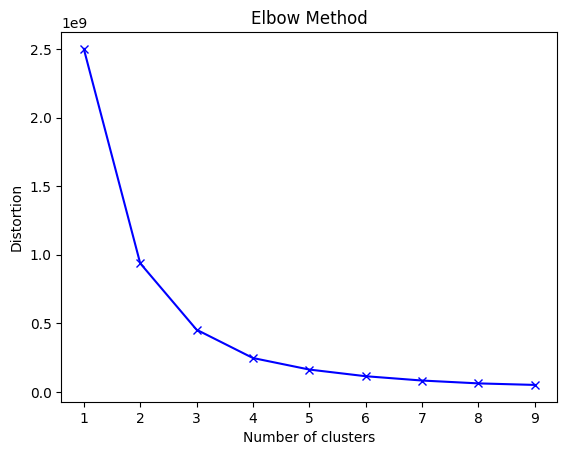

In [ ]:
distortions = []
K = range(1, 10)
for k in K:
 kmeans = KMeans(n_clusters=k, random_state=42)
 kmeans.fit(data_num)
 distortions.append(kmeans.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Fit the k-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
C_labels = kmeans.fit_predict(scaled_data_num)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
C_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = data['Rating']

In [ ]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_data_num, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_data_num, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_data_num, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.081
Rand Index Score: 0.186
Mutual Information Score: 0.081

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.241
Silhouette Coefficient: 0.462
Calinski Harabasz Score: 4362.943


In [ ]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = data['Platform']

In [ ]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_data_num, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_data_num, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_data_num, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.028
Rand Index Score: 0.005
Mutual Information Score: 0.027

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.241
Silhouette Coefficient: 0.462
Calinski Harabasz Score: 4362.943


In [ ]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = data['Genre']

In [ ]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_data_num, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_data_num, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_data_num, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.014
Rand Index Score: 0.001
Mutual Information Score: 0.014

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.241
Silhouette Coefficient: 0.462
Calinski Harabasz Score: 4362.943


In [ ]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = data['Developer']

In [ ]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_data_num, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_data_num, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_data_num, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.084
Rand Index Score: 0.112
Mutual Information Score: 0.062

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.241
Silhouette Coefficient: 0.462
Calinski Harabasz Score: 4362.943


In [ ]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = data['Publisher']

In [ ]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_data_num, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_data_num, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_data_num, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.034
Rand Index Score: -0.004
Mutual Information Score: 0.025

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.241
Silhouette Coefficient: 0.462
Calinski Harabasz Score: 4362.943
